In [18]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.09720439 0.08721913 0.05316533 ... 0.07339921 0.00537262 0.11066758]
 [0.22136281 0.19862346 0.12107298 ... 0.16715145 0.01223503 0.25202243]
 [0.44439768 0.39874721 0.24306049 ... 0.33556548 0.02456248 0.5059485 ]
 ...
 [0.57852695 0.51909813 0.31642164 ... 0.43684673 0.03197599 0.6586552 ]
 [0.0680025  0.06101699 0.03719354 ... 0.05134881 0.00375859 0.07742111]
 [0.35636861 0.31976087 0.19491355 ... 0.26909457 0.01969699 0.40572706]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.10073617  0.07853764  0.05735886 ... -0.03142548 -0.00158198
   0.17590708]
 [ 0.28850393  0.10587153  0.09043546 ...  0.13918547  0.09158964
   0.33311878]
 [ 0.36873519  0.33309626  0.37660639 ...  0.45787814  0.01635944
   0.40830482]
 ...
 [ 0.63292462  0.52374527  0.19179208 ...  0.23630977  0.09878602
   0.65071053]
 [-0.05831002 -0.04031261 -0.02962138 ... -0.11224224 -0.10128714
   0.16237643]
 [ 0.33080657  0.46709419  0.1753592  ...  0.43796335 -0.01158106
   0.21

In [19]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [20]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [21]:
K = np.min([K, U.shape[1]])
print(K)

5


In [22]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[-0.02578657  0.05604541 -0.26072318  0.19932933 -0.2198521  -0.08323731
  0.13266801  0.09679259  0.1415515  -0.32983923  0.20035274  0.06418444
  0.13708075 -0.14511984 -0.29988407  0.29966202  0.12211043 -0.04136288
  0.4629725  -0.19416381 -0.14430757  0.03625125  0.12422056  0.09863939
  0.16015504 -0.06038837  0.07221871 -0.07842506  0.10197064  0.18502967
 -0.24403944 -0.12508477 -0.31311363  0.29297186 -0.00845651 -0.18023619
  0.05345889  0.09659141 -0.04224232 -0.05801399  0.01941585  0.24887965
 -0.03006133 -0.045846    0.06584137 -0.09507501  0.32417917  0.10525167
  0.21606054  0.04183528]
[ 0.0705285  -0.0346761  -0.19912336  0.01142061  0.12398126 -0.13949067
  0.04815823 -0.06421403 -0.21536765 -0.0564376   0.33177977  0.08151121
  0.36078094 -0.10432825  0.0083026   0.14192094 -0.11200463 -0.00251035
 -0.19077636  0.09131642  0.03304058  0.14316553 -0.10173569  0.02994878
  0.12992053  0.06812022 -0.01623078 -0.20261489  0

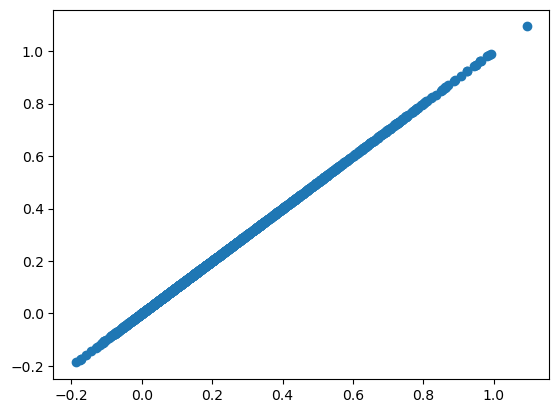

In [23]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

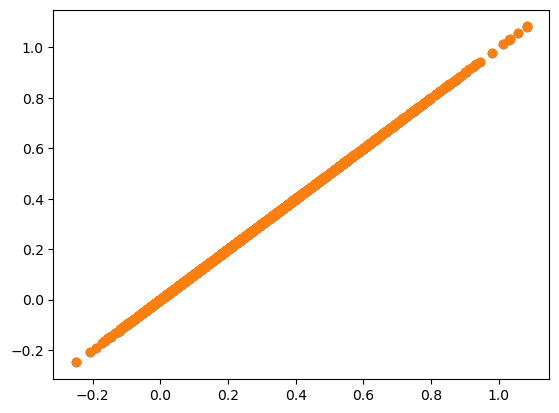

In [24]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [25]:
mycebmf.update_tau()
mycebmf.tau

array([[145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677],
       [145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677],
       [145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677],
       ...,
       [145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677],
       [145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677],
       [145.80852677, 145.80852677, 145.80852677, ..., 145.80852677,
        145.80852677, 145.80852677]])

In [26]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [27]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([ 0.21403413,  0.18409741,  0.10981216,  0.19013146,  0.02764774,
         0.02936915,  0.25960601,  0.27735685,  0.28541828,  0.0982952 ,
         0.0832537 ,  0.14193153, -0.00817145,  0.10950335,  0.14598109,
         0.15327108,  0.21890634,  0.15001968,  0.13054593,  0.11256015,
         0.16279636,  0.06804531,  0.23134543,  0.03380258,  0.05822847,
         0.2098118 ,  0.12824489,  0.01860182,  0.0732771 ,  0.14805144,
         0.09472883,  0.13955361,  0.11046361,  0.22538689,  0.23044665,
         0.21856036,  0.07700597,  0.15443353,  0.00780614,  0.22780313]),
 array([0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
        0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
        0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
        0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
        0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
        0.00589716, 0.00589716, 0.00589716, 0.00589716, 0.00589716,
      

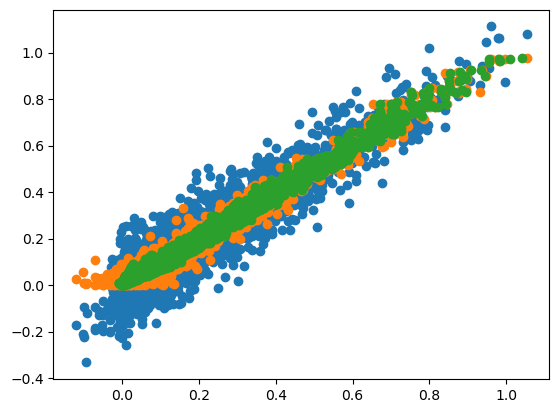

In [28]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


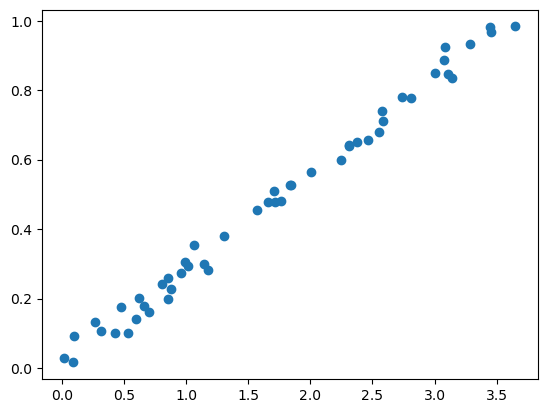

In [29]:
plt.scatter(mycebmf.L[:,0], u)

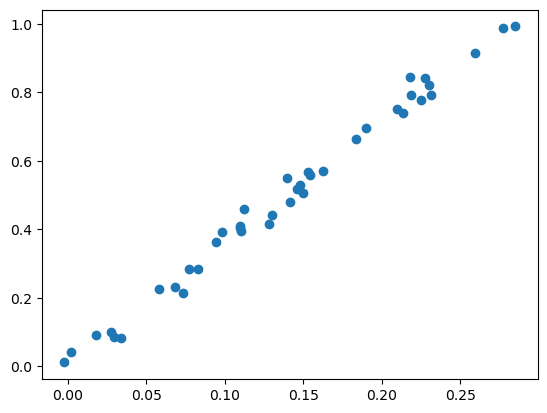

In [30]:
plt.scatter(mycebmf.F[:,0], v)

In [31]:
mycebmf.L[:,1]

array([-0.00520948,  0.01215394, -0.22061669,  0.1302451 , -0.16759382,
       -0.02362693,  0.05027691,  0.02810636,  0.06054876, -0.29104398,
        0.1356307 ,  0.0147192 ,  0.05368938, -0.06978956, -0.262955  ,
        0.2575465 ,  0.04440182, -0.00939649,  0.405258  , -0.12812156,
       -0.06685518,  0.00676321,  0.04625067,  0.02904861,  0.07965333,
       -0.01424884,  0.0163573 , -0.0207023 ,  0.03147356,  0.11347968,
       -0.20024385, -0.05109733, -0.27243763,  0.24994517, -0.00226995,
       -0.11244926,  0.01097063,  0.02741075, -0.00907185, -0.01434658,
        0.00363155,  0.20242292, -0.00678653, -0.0101383 ,  0.01420334,
       -0.02815916,  0.280097  ,  0.03137913,  0.15913833,  0.00824134])

In [32]:
for i in range(40):
    mycebmf.iter()

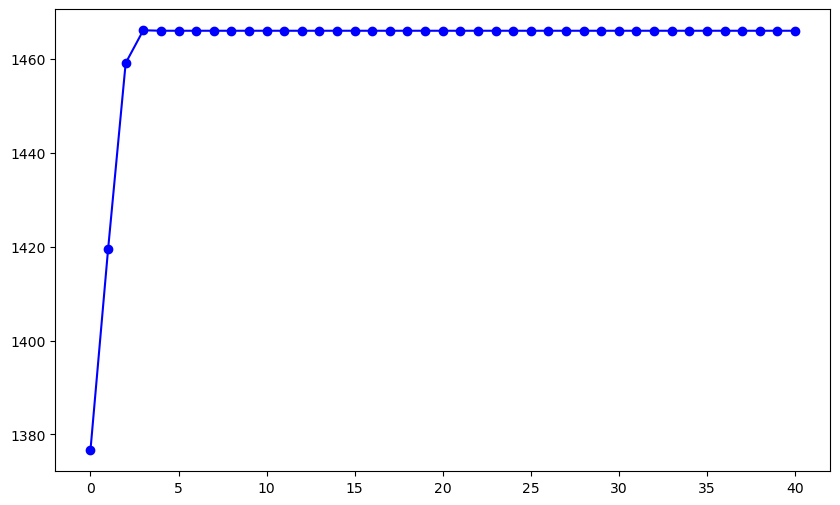

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

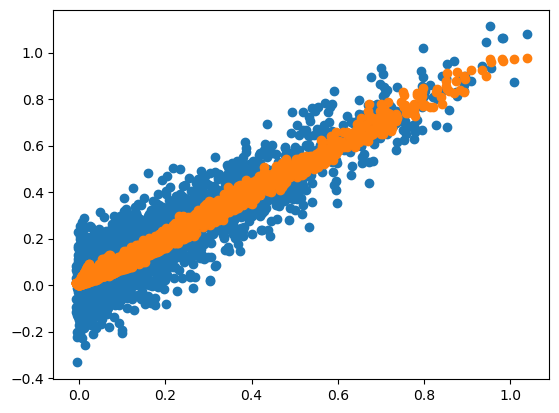

In [34]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)